#### Final Project Information
You should include the following sections in your project:
1. Abstract of no more than 300 words.
2. Introduction - research question clearly stated, can be answered by the data
3. EDA - well-labeled graphs/plots that are appropriate to your analysis. Each
visualization includes a description of what is being shown.
4. Data Wrangling - tidying of your data, manipulating missing values, structuring of
your data, etc.
5. Data Analysis.
6. Conclusions

### 1. Abstract

The objective of this project was to analyze toxic dumping sites in New York State and investigate whether the toxic dumping sites are targeting poorer areas of the state over more affluent areas.
Within the national literature on the matter, there is mounting evidence to support that companies are more likely to target poor areas rather than affluent ones. Toxic waste dump sites located near populations of people has been linked to increases in cancer, birth defects and other related developmental issues in children.

The seemingly widespread occurrence of these toxic dumping sites lead the Environmental Protection Agency (EPA) to create a federally supported program called the Superfund program which classifying, contains and eventually cleans up these toxic sites. The main data source I used for this project was a branch of the EPAs data, specifying New York State Superfund sites.

Through the research done in this project, I can conclude that the national trend of Superfund sites being in areas of higher poverty is in fact true on the state level here in NYS.


### 2. Introduction

Research Question:
Is there a clear relationship between the location of NYS Superfund sites and the associated poverty level of that area and can this relationship be properly recognized through statistical models and geomapping?

Is it supported by the data?
After the EDA and Data Wrangling steps, the full data frame used in the analysis contains all EPA recognized Superfund sites in NYS and houses the respective county names for each site as well as the latitude and longitude needed for the geomapping. Lastly, this data was joined with another dataset from the census, containing all county level percentage totals for poverty and income indicators.


### 3. EDA
- well-labeled graphs/plots that are appropriate to your analysis. Each
visualization includes a description of what is being shown.
- Note that a good bit of the EDA comes after the data cleaning*****

##### Quick overview of the datasets going into the project

In [1]:
### Import all required libraries and data for the start fo the project
import pandas as pd
import os
import opendatasets as od
kaggle_link = "https://www.kaggle.com/datasets/jonathanburns22/environmental-remediation-sites?select=Environmental_Remediation_Sites_20240409.csv"
#user and key for install : {"username":"jonathanburns22","key":"90005dcc01f5eaeba4c00db91c8fafe3"}
od.download(kaggle_link)
data_dir = '.\\environmental-remediation-sites'
os.listdir(data_dir)
df = pd.read_csv('environmental-remediation-sites/Environmental_Remediation_Sites_20240409.csv')

#poverty and income data, by NY County
pov_inc_df = pd.read_csv("https://raw.githubusercontent.com/jonburns2454/DATA-602/main/ACSDP5Y2022.csv")

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username:Your Kaggle username:Your Kaggle Key:Dataset URL: https://www.kaggle.com/datasets/jonathanburns22/environmental-remediation-sites


100%|██████████| 9.67M/9.67M [00:00<00:00, 36.1MB/s]


C:\Users\jashb\AppData\Local\Temp\ipykernel_21872\3229800676.py:10: DtypeWarning: Columns (0,5,8,13,14,19,22,25,26,27,28,29,30,31,34,37) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('environmental-remediation-sites/Environmental_Remediation_Sites_20240409.csv')


In [2]:
df.head()

,Program Number,Program Type,Program Facility Name,Site Class,Address1,Address2,Locality,County,ZIPCode,SWIS Code,...,Disposal City,Disposal ZIP,Disposal State,Operator Name,Operator Address1,Operator Address2,Operator City,Operator State,Operator Zip,Georeference
0,130069,HW,Roslyn Air National Guard Station,A,209 HARBOR HILL RD.,NaN,Roslyn,Nassau,11576,3022,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,POINT (-73.628608679 40.79635803)
1,130098,HW,Glen Head Groundwater Plume,N,Glen Head Road,NaN,Glen Head,Nassau,11545,3024,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,POINT (-73.62667717 40.83397813)
2,130119,HW,Former Thypin Steel Plant,A,5 Sagamore Hill Drive,NaN,Manorhaven,Nassau,11050,3022,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,POINT (-73.709502538 40.835351066)
3,152056,HW,Fire Island L.F.,N,152056 Fire Island L.F.,NaN,Fire Island Pines,Suffolk,11782,5222,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,POINT (-73.31517273 40.76110161)
4,231075,RCRA,Ashland Inc,C,609 W 131st Street,NaN,New York,New York,10027,3101,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,POINT (-73.957496 40.818198)


### 4. Data Cleaning & Formatting
- The poverty data I went with was very messy. So I started with some hand selection that began on the Census's Data Explorer.
- It came from the American Community Survey 5-Year Data.
- I chose to use the poverty rate and income identifiers by county.
- Following this I had to continue the cleaning in excel since this was in a demographic table form making it incredibly difficult to fully clean using python.
- I re-imported the semi-structured data into python from GitHub and then began the heavier formatting.
- I used the pandas melt function to convert the data into a long format and then back into wide to get the best format for my project

In [3]:
pov_inc_long = pd.melt(pov_inc_df, id_vars=pov_inc_df.columns[0], value_vars=pov_inc_df.columns[1:], var_name='column_name',value_name='value' )
pov_inc_long.head()

,Label (Grouping),column_name,value
0,Population 16 years and over,"Albany County, New York!!Percent","265,064"
1,Unemployment Rate,"Albany County, New York!!Percent",5.20%
2,Own children of the householder under 6 years,"Albany County, New York!!Percent","17,634"
3,All parents in family in labor force,"Albany County, New York!!Percent",76.90%
4,"Less than $10,000 Income","Albany County, New York!!Percent",5.30%


In [4]:
pov_inc_wide = pov_inc_long.pivot(index='column_name', columns='Label (Grouping)', values='value')
pov_inc_wide.head()

Label (Grouping),"$10,000 to $14,999 Income","$100,000 to $149,999 Income","$15,000 to $24,999 Income","$150,000 to $199,999 Income","$200,000 or more Income","$25,000 to $34,999 Income","$35,000 to $49,999 Income","$50,000 to $74,999 Income","$75,000 to $99,999 Income",65 years and over,All families below the poverty level,All parents in family in labor force,All people below the poverty level,"Less than $10,000 Income",Own children of the householder under 6 years,Population 16 years and over,Under 18 years below the poverty level,Unemployment Rate,With Food Stamp/SNAP benefits in the past 12 months,With related children of the householder under 18 years
column_name,,,,,,,,,,,,,,,,,,,,
"Albany County, New York!!Percent",3.80%,18.90%,6.50%,9.40%,11.00%,5.90%,9.80%,16.60%,12.60%,8.40%,7.20%,76.90%,12.50%,5.30%,"17,634","265,064",15.80%,5.20%,11.40%,13.10%
"Allegany County, New York!!Percent",4.50%,15.30%,8.80%,5.40%,3.40%,9.30%,12.80%,19.30%,14.40%,7.30%,10.40%,61.90%,17.10%,6.80%,"2,596","39,045",24.80%,7.30%,14.90%,18.90%
"Bronx County, New York!!Percent",9.50%,11.70%,10.70%,5.30%,4.80%,8.90%,11.80%,15.50%,10.70%,25.80%,22.50%,63.90%,26.90%,11.00%,"110,923","1,126,809",34.90%,11.20%,36.20%,30.60%
"Broome County, New York!!Percent",5.40%,15.40%,10.30%,6.10%,6.10%,8.60%,12.10%,17.60%,11.60%,9.10%,11.50%,66.80%,19.10%,6.90%,"11,213","165,200",25.10%,6.90%,15.40%,20.90%
"Cattaraugus County, New York!!Percent",6.70%,15.10%,9.50%,4.80%,3.70%,10.00%,13.80%,17.60%,13.30%,12.30%,12.40%,64.40%,17.40%,5.50%,"5,138","62,073",24.00%,5.40%,16.30%,20.30%


To keep things clean for the impending merge, I will need to remove the "New York!!Percent" from the County Column. First I need to add back in an index to keep my county classifiers in the dataset

In [5]:
pov_inc_wide = pov_inc_wide.reset_index(drop=False)
pov_inc_wide['column_name'] = pov_inc_wide['column_name'].str.replace(' County, New York!!Percent', '')
pov_inc_wide = pov_inc_wide.rename(columns={'column_name': 'County'})
pov_inc_wide.head()

Label (Grouping),County,"$10,000 to $14,999 Income","$100,000 to $149,999 Income","$15,000 to $24,999 Income","$150,000 to $199,999 Income","$200,000 or more Income","$25,000 to $34,999 Income","$35,000 to $49,999 Income","$50,000 to $74,999 Income","$75,000 to $99,999 Income",...,All families below the poverty level,All parents in family in labor force,All people below the poverty level,"Less than $10,000 Income",Own children of the householder under 6 years,Population 16 years and over,Under 18 years below the poverty level,Unemployment Rate,With Food Stamp/SNAP benefits in the past 12 months,With related children of the householder under 18 years
0,Albany,3.80%,18.90%,6.50%,9.40%,11.00%,5.90%,9.80%,16.60%,12.60%,...,7.20%,76.90%,12.50%,5.30%,"17,634","265,064",15.80%,5.20%,11.40%,13.10%
1,Allegany,4.50%,15.30%,8.80%,5.40%,3.40%,9.30%,12.80%,19.30%,14.40%,...,10.40%,61.90%,17.10%,6.80%,"2,596","39,045",24.80%,7.30%,14.90%,18.90%
2,Bronx,9.50%,11.70%,10.70%,5.30%,4.80%,8.90%,11.80%,15.50%,10.70%,...,22.50%,63.90%,26.90%,11.00%,"110,923","1,126,809",34.90%,11.20%,36.20%,30.60%
3,Broome,5.40%,15.40%,10.30%,6.10%,6.10%,8.60%,12.10%,17.60%,11.60%,...,11.50%,66.80%,19.10%,6.90%,"11,213","165,200",25.10%,6.90%,15.40%,20.90%
4,Cattaraugus,6.70%,15.10%,9.50%,4.80%,3.70%,10.00%,13.80%,17.60%,13.30%,...,12.40%,64.40%,17.40%,5.50%,"5,138","62,073",24.00%,5.40%,16.30%,20.30%


Post melt, comb over the data and check missingness

In [6]:
pov_inc_wide.isnull().sum()


Label (Grouping)
County                                                     0
$10,000 to $14,999 Income                                  0
$100,000 to $149,999 Income                                0
$15,000 to $24,999 Income                                  0
$150,000 to $199,999 Income                                0
$200,000 or more Income                                    0
$25,000 to $34,999 Income                                  0
$35,000 to $49,999 Income                                  0
$50,000 to $74,999 Income                                  0
$75,000 to $99,999 Income                                  0
65 years and over                                          0
All families below the poverty level                       0
All parents in family in labor force                       0
All people  below the poverty level                        0
Less than $10,000 Income                                   0
Own children of the householder under 6 years              0
Populat

Generate some standard statistics (no grouping yet)

In [7]:
pov_inc_wide.describe()

Label (Grouping),County,"$10,000 to $14,999 Income","$100,000 to $149,999 Income","$15,000 to $24,999 Income","$150,000 to $199,999 Income","$200,000 or more Income","$25,000 to $34,999 Income","$35,000 to $49,999 Income","$50,000 to $74,999 Income","$75,000 to $99,999 Income",...,All families below the poverty level,All parents in family in labor force,All people below the poverty level,"Less than $10,000 Income",Own children of the householder under 6 years,Population 16 years and over,Under 18 years below the poverty level,Unemployment Rate,With Food Stamp/SNAP benefits in the past 12 months,With related children of the householder under 18 years
count,61,61,61,61,61,61,61,61,61,61,...,61,61,61,61,61,61,61,61,61,61
unique,61,33,44,38,41,46,36,41,41,39,...,47,51,45,37,61,61,52,34,49,50
top,Albany,4.10%,14.90%,6.50%,6.10%,4.40%,8.40%,11.40%,17.60%,12.70%,...,8.50%,76.00%,10.40%,4.90%,"17,634","265,064",15.80%,5.10%,14.40%,6.20%
freq,1,6,3,4,4,4,4,6,5,4,...,3,3,4,4,1,1,3,4,3,3


## Now to join the cleaned poverty and income identifiers back into the toxic dumping dataset
- Starting with renaming the original df to provide more context
- Then merging the poverty and income identifiers back into the toxic dumping dataset"""

In [8]:
toxic_dumping_df = df


In [9]:
toxic_pov = pd.merge(toxic_dumping_df, pov_inc_wide, on='County', how='left')
toxic_pov.head()

,Program Number,Program Type,Program Facility Name,Site Class,Address1,Address2,Locality,County,ZIPCode,SWIS Code,...,All families below the poverty level,All parents in family in labor force,All people below the poverty level,"Less than $10,000 Income",Own children of the householder under 6 years,Population 16 years and over,Under 18 years below the poverty level,Unemployment Rate,With Food Stamp/SNAP benefits in the past 12 months,With related children of the householder under 18 years
0,130069,HW,Roslyn Air National Guard Station,A,209 HARBOR HILL RD.,NaN,Roslyn,Nassau,11576,3022,...,3.60%,73.30%,5.40%,2.80%,"85,416","1,127,987",6.00%,4.60%,4.30%,4.90%
1,130098,HW,Glen Head Groundwater Plume,N,Glen Head Road,NaN,Glen Head,Nassau,11545,3024,...,3.60%,73.30%,5.40%,2.80%,"85,416","1,127,987",6.00%,4.60%,4.30%,4.90%
2,130119,HW,Former Thypin Steel Plant,A,5 Sagamore Hill Drive,NaN,Manorhaven,Nassau,11050,3022,...,3.60%,73.30%,5.40%,2.80%,"85,416","1,127,987",6.00%,4.60%,4.30%,4.90%
3,152056,HW,Fire Island L.F.,N,152056 Fire Island L.F.,NaN,Fire Island Pines,Suffolk,11782,5222,...,4.20%,70.50%,6.50%,3.10%,"89,255","1,249,182",7.50%,4.80%,6.10%,6.20%
4,231075,RCRA,Ashland Inc,C,609 W 131st Street,NaN,New York,New York,10027,3101,...,11.90%,70.60%,15.80%,7.20%,"83,493","1,433,287",19.60%,6.80%,13.50%,16.10%


In order to proceed cleaning up the dataframe of irrelevant rows will help speed up the process

In [10]:
toxic_pov_cols = toxic_pov.columns.tolist()
print(toxic_pov_cols)
cols_to_keep = ['Program Number', 'Program Type', 'Program Facility Name', 'Site Class', 'Address1', 'Locality', 'County', 'ZIPCode', 'Latitude', 'Longitude', 'Georeference', '$10,000 to $14,999 Income', '$100,000 to $149,999 Income', '$15,000 to $24,999 Income', '$150,000 to $199,999 Income', '$200,000 or more Income', '$25,000 to $34,999 Income', '$35,000 to $49,999 Income', '$50,000 to $74,999 Income', '$75,000 to $99,999 Income', '65 years and over', 'All families below the poverty level', 'All parents in family in labor force', 'All people  below the poverty level', 'Less than $10,000 Income', 'Own children of the householder under 6 years', 'Population 16 years and over', 'Under 18 years below the poverty level', 'Unemployment Rate', 'With Food Stamp/SNAP benefits in the past 12 months', 'With related children of the householder under 18 years']
toxic_pov_cleaned = toxic_pov.loc[:, cols_to_keep]

['Program Number', 'Program Type', 'Program Facility Name', 'Site Class', 'Address1', 'Address2', 'Locality', 'County', 'ZIPCode', 'SWIS Code', 'DEC Region', 'Latitude', 'Longitude', 'Control Code', 'Control Type', 'OU', 'Project Name', 'Project Completion Date', 'Waste Name', 'Contaminants', 'Owner Name', 'Owner Address1', 'Owner Address2', 'Owner City', 'Owner State', 'Owner ZIP', 'Disposal Name', 'Disposal Address1', 'Disposal Address2', 'Disposal City', 'Disposal ZIP', 'Disposal State', 'Operator Name', 'Operator Address1', 'Operator Address2', 'Operator City', 'Operator State', 'Operator Zip', 'Georeference', '$10,000 to $14,999 Income', '$100,000 to $149,999 Income', '$15,000 to $24,999 Income', '$150,000 to $199,999 Income', '$200,000 or more Income', '$25,000 to $34,999 Income', '$35,000 to $49,999 Income', '$50,000 to $74,999 Income', '$75,000 to $99,999 Income', '65 years and over', 'All families below the poverty level', 'All parents in family in labor force', 'All people  b

Remove instances where lat and long are NA, since all data points
- This paired the data down from 240k rows to about 200k rows, giving a relatively complete dataset

In [11]:
toxic_pov_rm_na = toxic_pov_cleaned.dropna(subset=['Latitude', 'Longitude', 'All people  below the poverty level'])

### EDA and some further cleaning
- There are a few variables that need to be explored further before any true analysis

Libraries needed for this part

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import plotly.express as px


In [13]:
toxic_pov_rm_na.info()

<class 'pandas.core.frame.DataFrame'>
Index: 206931 entries, 0 to 218922
Data columns (total 31 columns):
 #   Column                                                   Non-Null Count   Dtype  
---  ------                                                   --------------   -----  
 0   Program Number                                           206931 non-null  object 
 1   Program Type                                             206931 non-null  object 
 2   Program Facility Name                                    206931 non-null  object 
 3   Site Class                                               206931 non-null  object 
 4   Address1                                                 206930 non-null  object 
 5   Locality                                                 206789 non-null  object 
 6   County                                                   206931 non-null  object 
 7   ZIPCode                                                  206519 non-null  object 
 8   Latitude           

In [14]:
toxic_pov_rm_na.isnull().sum()

Program Number                                               0
Program Type                                                 0
Program Facility Name                                        0
Site Class                                                   0
Address1                                                     1
Locality                                                   142
County                                                       0
ZIPCode                                                    412
Latitude                                                     0
Longitude                                                    0
Georeference                                                 0
$10,000 to $14,999 Income                                    0
$100,000 to $149,999 Income                                  0
$15,000 to $24,999 Income                                    0
$150,000 to $199,999 Income                                  0
$200,000 or more Income                                

Rename dataset so its easier to call through the EDA portion

In [15]:
full_df = toxic_pov_rm_na

Histograms of the key variables

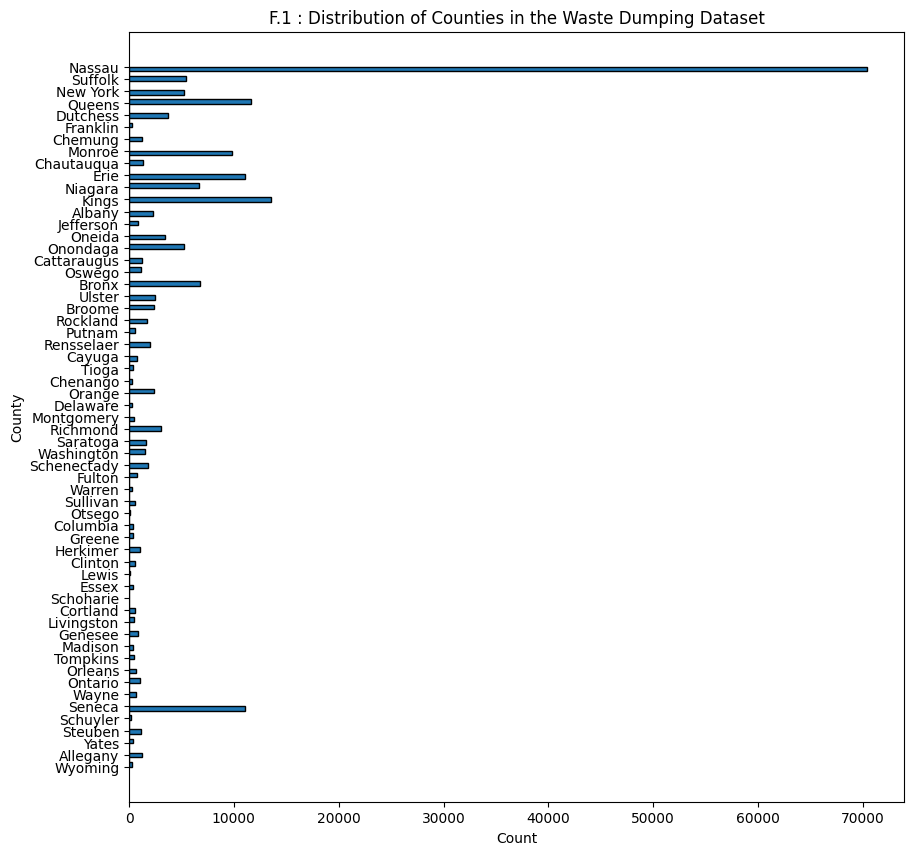

In [16]:
plt.figure(figsize=(10, 10))
counts, bins, patches = plt.hist(full_df['County'], bins=150, edgecolor='black', orientation='horizontal')  # Create the histogram
plt.gca().invert_yaxis()  # Invert the y-axis
plt.title(f'F.1 : Distribution of {'Counties'} in the Waste Dumping Dataset')  # Set the plot title
plt.xlabel('Count')  # Set the x-axis label
plt.ylabel('County') # Set the y-axis label
plt.show()

Figure 1: This distribution was to understand what counties have the highest prevalence of Environmental Remediation Sites in NYS. As shown above, the data is pretty heavily skewed in Nassau County. After some additional research, I discovered that Nassau County contains a massive Superfund site referred to most commonly as the New Cassel Industrial Area/ Hicksville Groundwater Contamination Superfund Site. This is a massive cleanup that has been on going for at least a decade, so the amount of information and documentation by the EPA is bountiful, hence the high prevalence of this site in the data.

What does poverty distribution look like across the counties?

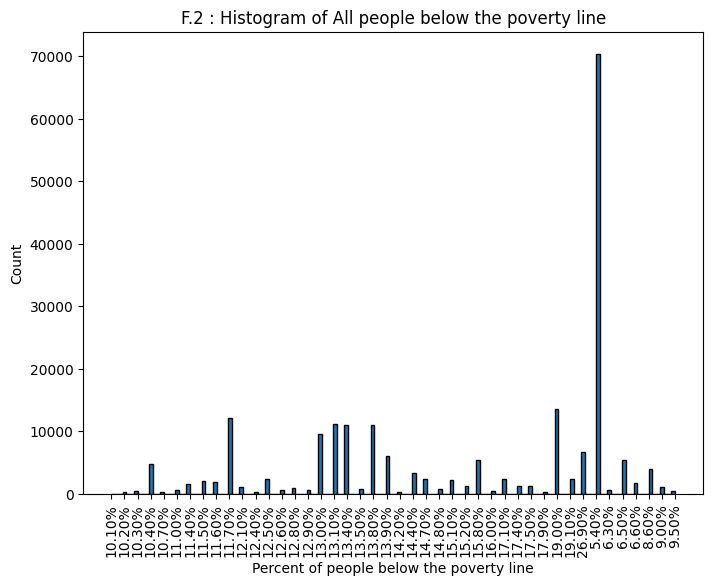

In [17]:
sorted_data = full_df['All people  below the poverty level'].sort_values()
plt.figure(figsize=(8, 6))
plt.hist(sorted_data, bins=150, edgecolor='black') 
plt.title(f'F.2 : Histogram of All people below the poverty line') 
plt.xlabel("Percent of people below the poverty line")  
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

Figure 2: Since the poverty and income data was joined in with the remediation dataset. After looking at the structure of the data again I noticed that the unique program number IDs are duplicated blowing up the actual count and distribution of remmemediation sites. I decided to drop the duplicates. This resulted in a much more accurate count of remediation sites.

In [18]:
full_df_dropped_dupes = full_df.drop_duplicates(subset=['Program Number'])
full_df_dropped_dupes.loc[:, 'Count'] = full_df_dropped_dupes.groupby('County')['County'].transform('count')


C:\Users\jashb\AppData\Local\Temp\ipykernel_21872\3193603983.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  full_df_dropped_dupes.loc[:, 'Count'] = full_df_dropped_dupes.groupby('County')['County'].transform('count')


### Post cleaning data EDA

Try running the histograms again and see if the data is more normalized

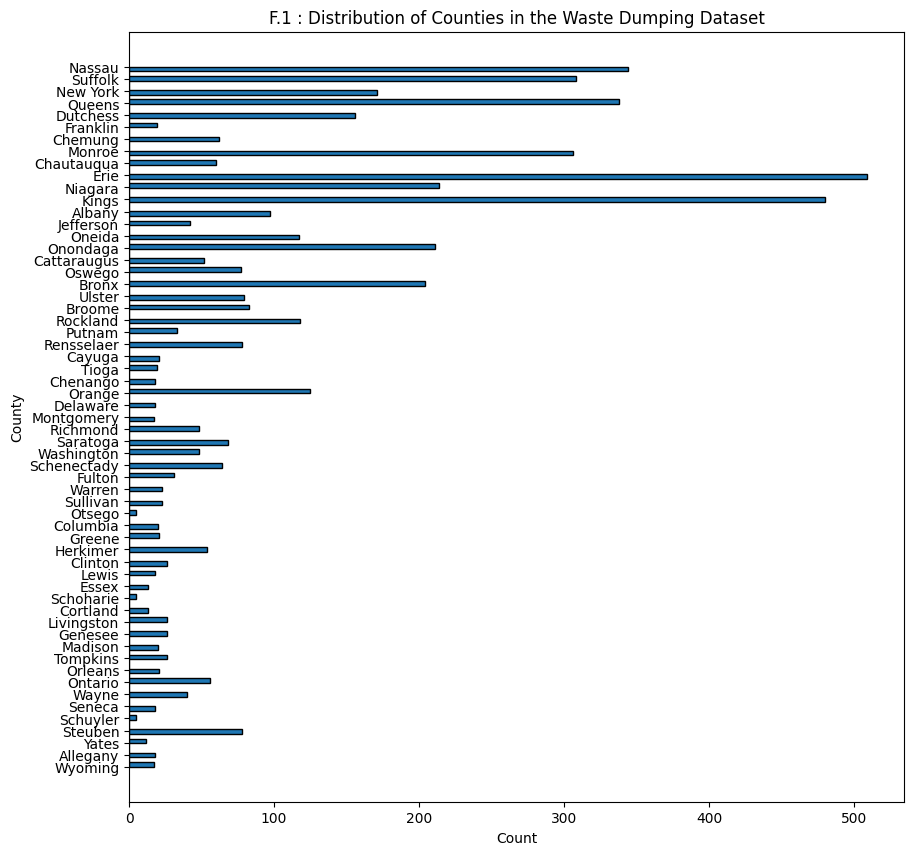

In [19]:
plt.figure(figsize=(10, 10))
counts, bins, patches = plt.hist(full_df_dropped_dupes['County'], bins=150, edgecolor='black', orientation='horizontal')  # Create the histogram
plt.gca().invert_yaxis()  # Invert the y-axis
plt.title(f'F.1 : Distribution of {'Counties'} in the Waste Dumping Dataset')  # Set the plot title
plt.xlabel('Count')  # Set the x-axis label
plt.ylabel('County') # Set the y-axis label
plt.show()

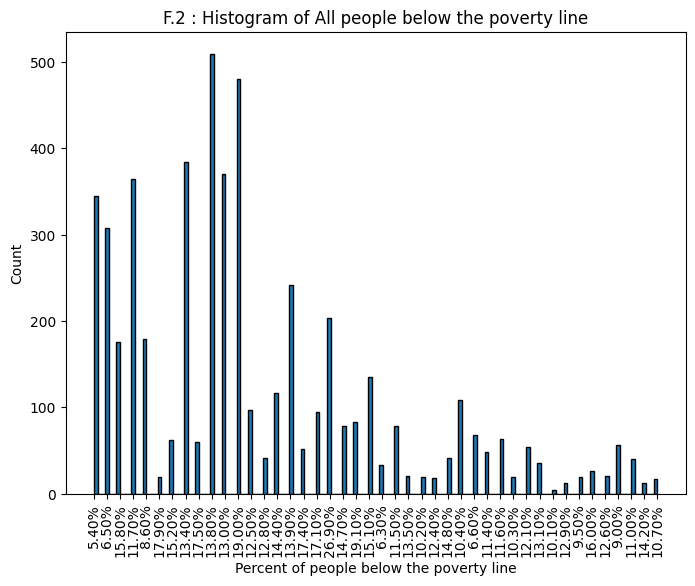

In [20]:
plt.figure(figsize=(8, 6))
plt.hist(full_df_dropped_dupes['All people  below the poverty level'], bins=150, edgecolor='black') 
plt.title(f'F.2 : Histogram of All people below the poverty line') 
plt.xlabel("Percent of people below the poverty line")  
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

Evalutating additional variables within the dataset

In [21]:
import plotly.express as px
import plotly.graph_objs as go
fig = px.histogram(full_df_dropped_dupes, x="Site Class", nbins=20)
layout = go.Layout(title='F.3 : Histogram of Site Class', width=800, height=600)
fig.update_layout(layout)
fig.show()

### 5. Data Analysis
- I think that based on how the data is structured

In [22]:
full = full_df_dropped_dupes
col_Names = full.columns
col_Names

Index(['Program Number', 'Program Type', 'Program Facility Name', 'Site Class',
       'Address1', 'Locality', 'County', 'ZIPCode', 'Latitude', 'Longitude',
       'Georeference', '$10,000 to $14,999 Income',
       '$100,000 to $149,999 Income', '$15,000 to $24,999 Income',
       '$150,000 to $199,999 Income', '$200,000 or more Income',
       '$25,000 to $34,999 Income', '$35,000 to $49,999 Income',
       '$50,000 to $74,999 Income', '$75,000 to $99,999 Income',
       '65 years and over', 'All families below the poverty level',
       'All parents in family in labor force',
       'All people  below the poverty level', 'Less than $10,000 Income',
       'Own children of the householder under 6 years',
       'Population 16 years and over',
       'Under 18 years below the poverty level', 'Unemployment Rate',
       'With Food Stamp/SNAP benefits in the past 12 months',
       'With related children of the householder under 18 years', 'Count'],
      dtype='object')

In [23]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
full = full_df_dropped_dupes
# format independent variable columns
def convert_percentages(df, columns):
    for col in columns:
        # Convert the column to a string data type
        df[col] = df[col].astype(str)
        
        # Remove the percentage sign and convert to numeric
        df[col] = df[col].str.replace('%', '').astype(float)
        
    return df
cols_to_convert = ['All people  below the poverty level', 'Unemployment Rate', 'With Food Stamp/SNAP benefits in the past 12 months', 'Less than $10,000 Income', '$10,000 to $14,999 Income', '$15,000 to $24,999 Income', '$25,000 to $34,999 Income', '$35,000 to $49,999 Income', '$50,000 to $74,999 Income', '$75,000 to $99,999 Income', '$100,000 to $149,999 Income', '$150,000 to $199,999 Income', '$200,000 or more Income', 'Under 18 years below the poverty level']
needed_cols = convert_percentages(full, cols_to_convert)

C:\Users\jashb\AppData\Local\Temp\ipykernel_21872\1855507098.py:9: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\jashb\AppData\Local\Temp\ipykernel_21872\1855507098.py:12: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\jashb\AppData\Local\Temp\ipykernel_21872\1855507098.py:9: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pand

Testing for multicollinearity

In [24]:
import matplotlib.pyplot as plt
corr_plot_df = full[['Count', 'All people  below the poverty level', 'Unemployment Rate', 'With Food Stamp/SNAP benefits in the past 12 months', 'Less than $10,000 Income', '$10,000 to $14,999 Income', '$15,000 to $24,999 Income', '$25,000 to $34,999 Income', '$35,000 to $49,999 Income', '$50,000 to $74,999 Income', '$75,000 to $99,999 Income', '$100,000 to $149,999 Income', '$150,000 to $199,999 Income', '$200,000 or more Income', 'Under 18 years below the poverty level']]

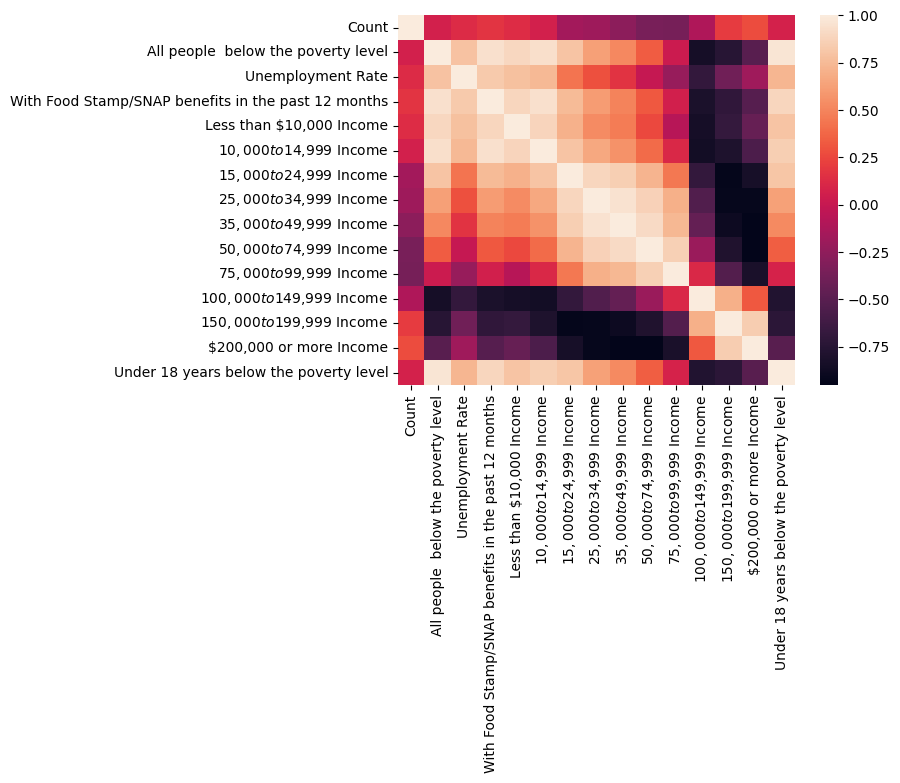

In [25]:
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns
ax = sns.heatmap(corr_plot_df.corr())

After looking at the corr.plot I think it is best to compare a bivariate regression and a multivariate (with two independent variables). The variables present in the dataset are highly correlated to each other, presenting a major problem with multicollinearity. Therefore I will not be running regression on all of the independent variables.

I will run two separate regressions here:
1. A bivariate regression
2. A multivariate regression with two independent variables

In [26]:
# Bivariate Regression
biv_vars = ['With Food Stamp/SNAP benefits in the past 12 months']
y = full['Count']
X = full[biv_vars]

X = sm.add_constant(X)


poisson_model = sm.GLM(y, X.astype(float), family=sm.families.Poisson()).fit()
np.set_printoptions(suppress=True)
print(poisson_model.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                  Count   No. Observations:                 5219
Model:                            GLM   Df Residuals:                     5217
Model Family:                 Poisson   Df Model:                            1
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:            -3.3377e+05
Date:                Sat, 11 May 2024   Deviance:                   6.3139e+05
Time:                        18:23:59   Pearson chi2:                 5.73e+05
No. Iterations:                     5   Pseudo R-squ. (CS):             0.9646
Covariance Type:            nonrobust                                         
                                                          coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------

Visualize the regression

In [27]:
full = full_df_dropped_dupes
subset_full = full.loc[:, ['County','All people  below the poverty level', 'Unemployment Rate',  'With Food Stamp/SNAP benefits in the past 12 months', 'Count']]

subset_full.columns

Index(['County', 'All people  below the poverty level', 'Unemployment Rate',
       'With Food Stamp/SNAP benefits in the past 12 months', 'Count'],
      dtype='object')

Optimization terminated successfully.
         Current function value: 63.951963
         Iterations 5


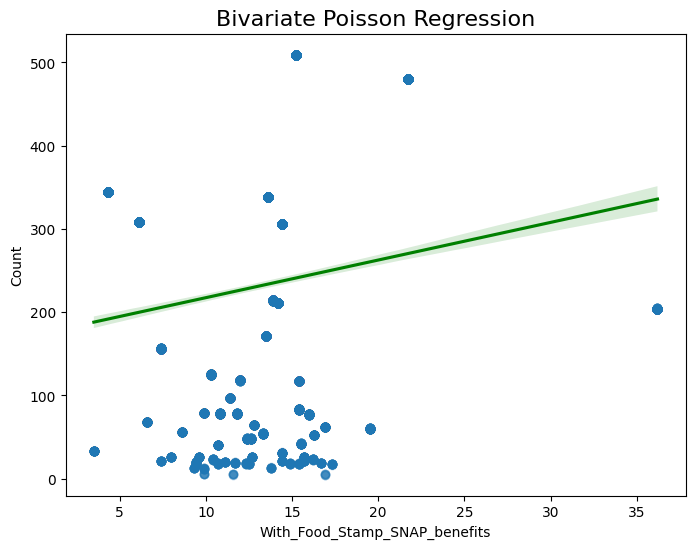

In [28]:
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.formula.api as smf

subset_full = subset_full.rename(columns={'With Food Stamp/SNAP benefits in the past 12 months': 'With_Food_Stamp_SNAP_benefits'})
poisson_model = smf.poisson('Count ~ With_Food_Stamp_SNAP_benefits', data=subset_full).fit()
fig, ax = plt.subplots(figsize=(8, 6))
sns.regplot(x='With_Food_Stamp_SNAP_benefits',
            y='Count',
            data=subset_full,
            y_jitter=0.3,
            scatter_kws={'alpha': 0.3},
            line_kws={'color':'green', 'label':'Poisson Regression'},
            fit_reg=lambda x: poisson_model.predict(subset_full),
            ax=ax)

ax.set_title("Bivariate Poisson Regression", fontsize=16)

plt.show()

In [29]:

# Specify the dependent variable and independent variables
mult_vars = ['With Food Stamp/SNAP benefits in the past 12 months', 'Unemployment Rate']
y = full['Count']
X = full[mult_vars]
# Add a constant term to the independent variables
X = sm.add_constant(X)
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
# Fit the Poisson regression model
poisson_model = sm.GLM(y, X.astype(float), family=sm.families.Poisson()).fit()
np.set_printoptions(suppress=True)
print(poisson_model.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                  Count   No. Observations:                 5219
Model:                            GLM   Df Residuals:                     5216
Model Family:                 Poisson   Df Model:                            2
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:            -3.3318e+05
Date:                Sat, 11 May 2024   Deviance:                   6.3021e+05
Time:                        18:24:00   Pearson chi2:                 5.66e+05
No. Iterations:                     5   Pseudo R-squ. (CS):             0.9718
Covariance Type:            nonrobust                                         
                                                          coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------

Optimization terminated successfully.
         Current function value: 63.838924
         Iterations 5


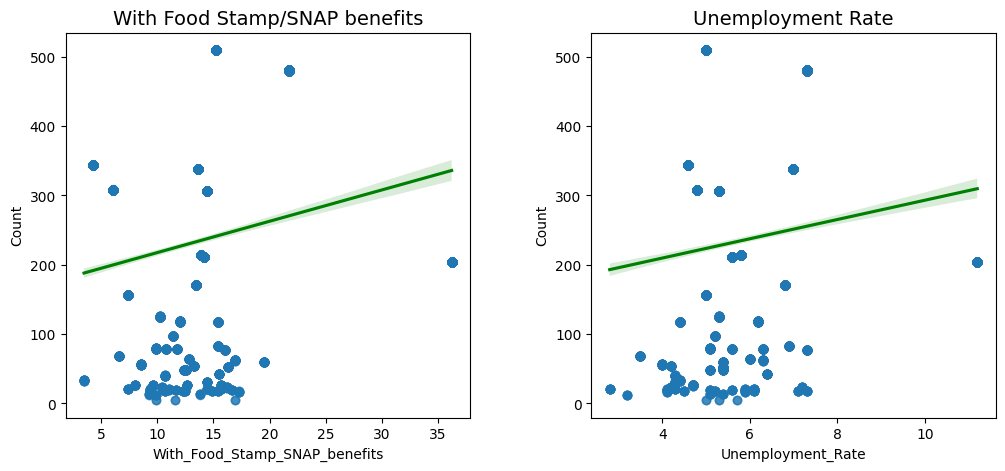

In [30]:
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.formula.api as smf


subset_full = subset_full.rename(columns={'With Food Stamp/SNAP benefits in the past 12 months': 'With_Food_Stamp_SNAP_benefits',
                                          'Unemployment Rate': 'Unemployment_Rate'})
poisson_model = smf.poisson('Count ~ With_Food_Stamp_SNAP_benefits + Unemployment_Rate', data=subset_full).fit()

fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(12, 5))

sns.regplot(x='With_Food_Stamp_SNAP_benefits',
            y='Count',
            data=subset_full,
            y_jitter=0.3,
            scatter_kws={'alpha': 0.3},
            line_kws={'color':'green', 'label':'Poisson Regression'},
            fit_reg=lambda x: poisson_model.predict(subset_full),
            ax=ax1)
ax1.set_title("With Food Stamp/SNAP benefits", fontsize=14)

sns.regplot(x='Unemployment_Rate',
            y='Count',
            data=subset_full,
            y_jitter=0.3,
            scatter_kws={'alpha': 0.3},
            line_kws={'color':'green', 'label':'Poisson Regression'},
            fit_reg=lambda x: poisson_model.predict(subset_full),
            ax=ax2)
ax2.set_title("Unemployment Rate", fontsize=14)
plt.subplots_adjust(wspace=0.3)

plt.show()

Description: I wanted to see visually if there was any reason to use the multivariate poisson regression over the bivariate regression, I think that this plot helps to support that the bivariate to multivariate prediction power is nearly the same and the unemployment rate addition doesnt really help with that.

In [31]:
# Specify the dependent variable and independent variables
biv_vars = ['With Food Stamp/SNAP benefits in the past 12 months']
y = full['Count']
X = full[biv_vars]

# Add a constant term to the independent variables
X = sm.add_constant(X)

# Fit the negative binomial regression model
nb_model = sm.GLM(y, X.astype(float), family=sm.families.NegativeBinomial()).fit()
np.set_printoptions(suppress=True)
print(nb_model.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                  Count   No. Observations:                 5219
Model:                            GLM   Df Residuals:                     5217
Model Family:        NegativeBinomial   Df Model:                            1
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -33677.
Date:                Sat, 11 May 2024   Deviance:                       3787.2
Time:                        18:24:01   Pearson chi2:                 2.44e+03
No. Iterations:                     5   Pseudo R-squ. (CS):            0.01429
Covariance Type:            nonrobust                                         
                                                          coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------

c:\Users\jashb\Lib\site-packages\statsmodels\genmod\families\family.py:1367: ValueWarning:

Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.



Analysis results: Overall, both linear models performed well. However, the multivariate model performed slightly better than the bivariate model. Both models utilized the Poisson model family since it tends to perform the best when evaluating where the dependent variable is a count of an event or something. In this case the count variable is how many toxic waste dump sites are there by county in NYS. The bivariate poisson regression yielded strong results indicating a positive, statistically significant relationship between toxic waste dump sites and percent of population with Food Stamp/SNAP benefits in the past 12 months. This Food Stamp/ SNAP benefit variable is used as a proxy for poverty in this case, and is often used as a supplemental poverty measure by the US Census. I compared model performance between Poisson and Negative Binomial to decide which model had a better overall fit. By evaluating the Log-Likelihood, Deviance and Pearson chi2, the bivartiate poisson model seems to perform slightly better than both the mutlivariate poisson and the bivariate negative binomial models. The results of the regression indicate that there is a strong relationship between poverty stricken areas and the likelihood of companies dumping toxic waste, playing into the national narrative that these communities are more likely to be targeted.


#### Final mapping 

In [32]:
full.columns

Index(['Program Number', 'Program Type', 'Program Facility Name', 'Site Class',
       'Address1', 'Locality', 'County', 'ZIPCode', 'Latitude', 'Longitude',
       'Georeference', '$10,000 to $14,999 Income',
       '$100,000 to $149,999 Income', '$15,000 to $24,999 Income',
       '$150,000 to $199,999 Income', '$200,000 or more Income',
       '$25,000 to $34,999 Income', '$35,000 to $49,999 Income',
       '$50,000 to $74,999 Income', '$75,000 to $99,999 Income',
       '65 years and over', 'All families below the poverty level',
       'All parents in family in labor force',
       'All people  below the poverty level', 'Less than $10,000 Income',
       'Own children of the householder under 6 years',
       'Population 16 years and over',
       'Under 18 years below the poverty level', 'Unemployment Rate',
       'With Food Stamp/SNAP benefits in the past 12 months',
       'With related children of the householder under 18 years', 'Count'],
      dtype='object')

Create a Low-Medium, High and Extreme Poverty category

In [33]:
full['poverty_classification'] = np.where(full['All people  below the poverty level'] >= 40, 'Extreme Poverty Area',
                                  np.where(full['All people  below the poverty level'] >= 20, 'High Poverty Area',
                                           np.where(full['All people  below the poverty level'] <= 5, 'Low Poverty Area', 'Medium Poverty Area')))

C:\Users\jashb\AppData\Local\Temp\ipykernel_21872\1247741683.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Mapping Indivdual Dump Sites

In [34]:
import plotly.express as px
import pandas as pd
#color_scale = [(0, 'orange'), (1,'red')]
fig = px.scatter_mapbox(full, 
                        lat="Latitude", 
                        lon="Longitude", 
                        hover_name='County', 
                        hover_data=['ZIPCode','Program Type','Site Class'],
                        color_discrete_sequence=['fuchsia'],
                        size='Count',
                        color='With Food Stamp/SNAP benefits in the past 12 months',
                        zoom=5, 
                        height=600,
                        width=1200,
                        opacity= 0.3,
                        size_max = 14)

fig.update_layout(mapbox_style="open-street-map")
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.update_layout(title='Individual Dump Sites')
fig.show()

Mapping data grouped by County

In [35]:
import plotly.express as px

# Assuming your DataFrame is called 'subset_full' and has columns 'County', 'Latitude', and 'Longitude'
grouped_coords = full.groupby('County')[['Latitude', 'Longitude', 'All people  below the poverty level','Unemployment Rate', 'With Food Stamp/SNAP benefits in the past 12 months', 'Count']].mean().reset_index()

fig = px.scatter_mapbox(grouped_coords,
                        lat='Latitude',
                        lon='Longitude',
                        hover_name='County',
                        size='Count',
                        color='With Food Stamp/SNAP benefits in the past 12 months',
                        zoom=5, opacity= 0.8,
                        size_max = 40,
                        height = 800)  # Adjust the zoom level as needed

fig.update_layout(mapbox_style='open-street-map')
fig.update_layout(title='Dump Sites Grouped by County')
fig.show()

### 6. Conclusion:
The data analysis as well the respective geo-mapping example support that the national research on Superfund sites is also applicable in New York State too.
The GLM Poisson model used to evaluate the relationship between Superfund sites and the percentage of the county who have used food stamps within the last year (a proxy for poverty levels) was a good fit for the data as well, making the statistically significant relationship even more trusted.
While a lot of these Superfund sites are clustered around high population urban areas, there is also clustering in smaller rural poor communities, indicating that this is a problem that spans the state regardless of population clusters.
While this project did yield statistically significant results they are not further broken down by other crucial demographics. In the national literature, much of the research has been stratified by race and classified poverty brackets.
Further research is needed in these areas, and highlight here my research fell short.




Sources:

poverty_ACS_data = https://data.census.gov/table/ACSDP5Y2022.DP03?t=Income%20and%20Poverty:Poverty&g=040XX00US36$0500000&y=2022&d=ACS%205-Year%20Estimates%20Data%20Profiles&moe=false&tp=false
EPA_NYS_data = https://www.kaggle.com/datasets/jonathanburns22/environmental-remediation-sites?select=Environmental_Remediation_Sites_20240409.csv #pulled using API